In [55]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
cd DB files

C:\Users\Trypt\Desktop\KBB\DB files


In [39]:
df = pd.read_csv("car_data_age(innerjoin).csv")

In [40]:
df["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        453148
Ford             441015
Toyota           301678
Nissan           255457
Honda            232572
Jeep             194300
Hyundai          145630
GMC              133936
BMW              132931
Lexus            126759
Dodge            112588
Kia              103756
Mercedes-Benz     91241
Ram               88959
Volkswagen        81611
Subaru            69253
Acura             63942
Cadillac          61298
Mazda             60884
Buick             57005
Audi              45905
Chrysler          44569
INFINITI          39352
Lincoln           29397
Land Rover        23554
MINI              21405
Volvo             20039
Porsche           17620
Mitsubishi        11841
Scion              9139
Jaguar             6826
Pontiac            6491
FIAT               4785
Saturn             3577
Mercury            3393
HUMMER             3297
Maserati           3013
Bentley            1392
Ferrari            1155
smart               966
Suzuki              903
Saab            

In [41]:
#this one VVVV removes a lot more makes, might use it again laster
#df = df.drop(df[df["Make Ss"] == "Panoz"].index | df[df["Make Ss"] == "Daewoo"].index | df[df["Make Ss"] == "Maybach"].index | df[df["Make Ss"] == "AM General"].index | df[df["Make Ss"] == "Geo"].index | df[df["Make Ss"] == "Fisker"].index | df[df["Make Ss"] == "Alfa Romeo"].index | df[df["Make Ss"] == "Lotus"].index | df[df["Make Ss"] == "McLaren"].index | df[df["Make Ss"] == "Plymouth"].index | df[df["Make Ss"] == "Isuzu"].index | df[df["Make Ss"] == "Oldsmobile"].index | df[df["Make Ss"] == "Lamborghini"].index | df[df["Make Ss"] == "Rolls-Royce"].index | df[df["Make Ss"] == "Aston Martin"].index | df[df["Make Ss"] == "Saab"].index | df[df["Make Ss"] == "smart"].index | df[df["Make Ss"] == "Suzuki"].index | df[df["Make Ss"] == "Infiniti"].index | df[df["Make Ss"] == "Ferrari"].index | df[df["Make Ss"] == "Bentley"].index | df[df["Make Ss"] == "Maserati"].index | df[df["Make Ss"] == "HUMMER"].index | df[df["Make Ss"] == "Mercury"].index | df[df["Make Ss"] == "Saturn"].index | df[df["Make Ss"] == "FIAT"].index | df[df["Make Ss"] == "Pontiac"].index | df[df["Make Ss"] == "Jaguar"].index | df[df["Make Ss"] == "Scion"].index | df[df["Make Ss"] == "Mitsubishi"].index | df[df["Make Ss"] == "Porsche"].index | df[df["Make Ss"] == "Volvo"].index | df[df["Make Ss"] == "MINI"].index | df[df["Make Ss"] == "Land Rover"].index | df[df["Make Ss"] == "Lincoln"].index | df[df["Make Ss"] == "INFINITI"].index | df[df["Make Ss"] == "Chrysler"].index | df[df["Make Ss"] == "Audi"].index | df[df["Make Ss"] == "Buick"].index | df[df["Make Ss"] == "Mazda"].index | df[df["Make Ss"] == "Cadillac"].index | df[df["Make Ss"] == "Acura"].index | df[df["Make Ss"] == "Subaru"].index | df[df["Make Ss"] == "Volkswagen"].index | df[df["Make Ss"] == "Ram"].index | df[df["Make Ss"] == "Mercedes-Benz"].index | df[df["Make Ss"] == "Kia"].index | df[df["Make Ss"] == "Dodge"].index)
#removes low number (sub 30k total) car makes
df = df.drop(df[df["Make Ss"] == "Panoz"].index | df[df["Make Ss"] == "Daewoo"].index | df[df["Make Ss"] == "Maybach"].index | df[df["Make Ss"] == "AM General"].index | df[df["Make Ss"] == "Geo"].index | df[df["Make Ss"] == "Fisker"].index | df[df["Make Ss"] == "Alfa Romeo"].index | df[df["Make Ss"] == "Lotus"].index | df[df["Make Ss"] == "McLaren"].index | df[df["Make Ss"] == "Plymouth"].index | df[df["Make Ss"] == "Isuzu"].index | df[df["Make Ss"] == "Oldsmobile"].index | df[df["Make Ss"] == "Lamborghini"].index | df[df["Make Ss"] == "Rolls-Royce"].index | df[df["Make Ss"] == "Aston Martin"].index | df[df["Make Ss"] == "Saab"].index | df[df["Make Ss"] == "smart"].index | df[df["Make Ss"] == "Suzuki"].index | df[df["Make Ss"] == "Infiniti"].index | df[df["Make Ss"] == "Ferrari"].index | df[df["Make Ss"] == "Bentley"].index | df[df["Make Ss"] == "Maserati"].index | df[df["Make Ss"] == "HUMMER"].index | df[df["Make Ss"] == "Mercury"].index | df[df["Make Ss"] == "Saturn"].index | df[df["Make Ss"] == "FIAT"].index | df[df["Make Ss"] == "Pontiac"].index | df[df["Make Ss"] == "Jaguar"].index | df[df["Make Ss"] == "Scion"].index | df[df["Make Ss"] == "Mitsubishi"].index | df[df["Make Ss"] == "Porsche"].index | df[df["Make Ss"] == "Volvo"].index | df[df["Make Ss"] == "MINI"].index | df[df["Make Ss"] == "Land Rover"].index | df[df["Make Ss"] == "Lincoln"].index)
df["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        453148
Ford             441015
Toyota           301678
Nissan           255457
Honda            232572
Jeep             194300
Hyundai          145630
GMC              133936
BMW              132931
Lexus            126759
Dodge            112588
Kia              103756
Mercedes-Benz     91241
Ram               88959
Volkswagen        81611
Subaru            69253
Acura             63942
Cadillac          61298
Mazda             60884
Buick             57005
Audi              45905
Chrysler          44569
INFINITI          39352
Name: Make Ss, dtype: int64

In [83]:
# US Divided into 9 regions as outlined by the Census Bureau
# New England contains CT, ME, MA, NH, RI, VT
newengland = df[(df["State Ss"] == "CT") | (df["State Ss"] == "ME") | (df["State Ss"] == "MA") | (df["State Ss"] == "NH") | (df["State Ss"] == "RI") | (df["State Ss"] == "VT")]
# Mid Atlantic contains NY, NJ, and PA
midatlantic = df[(df["State Ss"] == "NY") | (df["State Ss"] == "NJ") | (df["State Ss"] == "PA")]
# East North Central contains IL, IN, MI, OH, WI
encentral = df[(df["State Ss"] == "IL") | (df["State Ss"] == "IN") | (df["State Ss"] == "MI") | (df["State Ss"] == "OH") | (df["State Ss"] == "WI")]
# West North Central contains IA, KS, MN, MI, NE, ND, SD
wncentral = df[(df["State Ss"] == "IA") | (df["State Ss"] == "KS") | (df["State Ss"] == "MN") | (df["State Ss"] == "MI") | (df["State Ss"] == "NE") | (df["State Ss"] == "ND") | (df["State Ss"] == "SD")]
# South Atlantic contains FL, GA, SC, NC, VA, WV, DC, MD, DE
satlantic = df[(df["State Ss"] == "FL") | (df["State Ss"] == "GA") | (df["State Ss"] == "SC") | (df["State Ss"] == "NC") | (df["State Ss"] == "VA") | (df["State Ss"] == "WV") | (df["State Ss"] == "DC") | (df["State Ss"] == "MD") | (df["State Ss"] == "DE")]
# East South Central contains AL, MS, TN, KY
escentral = df[(df["State Ss"] == "AL") | (df["State Ss"] == "MS") | (df["State Ss"] == "TN") | (df["State Ss"] == "KY")]
# West South Central contains AR, LA, OH, TX
wscentral = df[(df["State Ss"] == "AR") | (df["State Ss"] == "LA") | (df["State Ss"] == "OH") | (df["State Ss"] == "TX")]
# Mountain contains AZ, CO, ID, MT, NV, NM, UT, WY
mountain = df[(df["State Ss"] == "AZ") | (df["State Ss"] == "CO") | (df["State Ss"] == "ID") | (df["State Ss"] == "MT") | (df["State Ss"] == "NV") | (df["State Ss"] == "NM") | (df["State Ss"] == "UT") | (df["State Ss"] == "WY")]
# Pacific contains AK, CA, HI, OR, WA
pacific = df[(df["State Ss"] == "AK") | (df["State Ss"] == "CA") | (df["State Ss"] == "HI") | (df["State Ss"] == "OR") | (df["State Ss"] == "WA")]

In [43]:
# New England contains CT, ME, MA, NH, RI, VT
# Most popular used car makes by listings
newengland["Make Ss"].value_counts().sort_values(ascending = False)

Ford             19887
Toyota           19013
Honda            18699
Chevrolet        15964
Nissan           13691
Jeep             11135
Mercedes-Benz    10849
Subaru            9291
Hyundai           9242
BMW               8226
GMC               6843
Lexus             6467
Kia               5878
Volkswagen        5865
Audi              5273
Cadillac          4048
Acura             3581
Mazda             3331
Ram               2905
Dodge             2663
INFINITI          2323
Buick             1955
Chrysler          1223
Name: Make Ss, dtype: int64

In [46]:
# Mid Atlantic contains NY, NJ, and PA
# Most popular used car makes by listings
midatlantic["Make Ss"].value_counts().sort_values(ascending = False)

Ford             44665
Chevrolet        43074
Toyota           30718
Nissan           27639
Honda            26203
Jeep             25567
Hyundai          19047
Subaru           14573
BMW              13261
GMC              11268
Kia              10899
Mercedes-Benz     9112
Ram               9108
Dodge             8967
Volkswagen        8842
Mazda             8313
Acura             7020
Lexus             6536
Audi              5680
Buick             5052
Cadillac          4970
INFINITI          4164
Chrysler          3533
Name: Make Ss, dtype: int64

In [47]:
# East North Central contains IL, IN, MI, OH, WI
# Most popular used car makes by listings
encentral["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        95625
Ford             92169
Jeep             36202
Toyota           29903
Nissan           29103
GMC              28088
Honda            23882
Dodge            21299
Hyundai          17886
Kia              16757
Ram              14980
Buick            14785
Volkswagen       12101
Cadillac         11582
Mazda            10910
Chrysler         10651
BMW              10254
Subaru            9357
Mercedes-Benz     8044
Lexus             7393
Audi              5436
Acura             5252
INFINITI          3791
Name: Make Ss, dtype: int64

In [48]:
# West North Central contains IA, KS, MN, MI, NE, ND, SD
# Most popular used car makes by listings
wncentral["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        59636
Ford             52154
Jeep             19573
GMC              19333
Toyota           16405
Nissan           13341
Dodge            12057
Honda            11479
Ram               9884
Buick             8649
Hyundai           7207
Cadillac          6612
Kia               6490
Chrysler          5423
Volkswagen        5422
Lexus             5313
BMW               5216
Subaru            4240
Mazda             3684
Mercedes-Benz     3500
Audi              3066
Acura             2718
INFINITI          1780
Name: Make Ss, dtype: int64

In [49]:
# South Atlantic contains FL, GA, SC, NC, VA, WV, DC, MD, DE
# Most popular used car makes by listings
satlantic["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        128948
Toyota           118820
Ford             113216
Honda            100834
Nissan            91974
Lexus             66563
BMW               57375
Jeep              56839
Hyundai           51354
Mercedes-Benz     34868
Kia               34750
Dodge             33265
GMC               32520
Acura             29809
Volkswagen        27258
Ram               21471
Cadillac          18759
Mazda             18370
Buick             16764
INFINITI          15054
Subaru            14932
Chrysler          13290
Audi              13089
Name: Make Ss, dtype: int64

In [50]:
# East South Central contains AL, MS, TN, KY
# Most popular used car makes by listings
escentral["Make Ss"].value_counts().sort_values(ascending = False)

Chevrolet        29289
Ford             26925
Nissan           22626
Toyota           18133
Honda            12457
Jeep             11405
GMC               8987
Hyundai           8829
Lexus             7636
Dodge             7265
Kia               6255
BMW               5911
Ram               5675
Mercedes-Benz     4024
Cadillac          3741
Acura             3730
Volkswagen        3597
Buick             3380
Mazda             3205
Chrysler          2957
INFINITI          2884
Subaru            1851
Audi              1671
Name: Make Ss, dtype: int64

In [51]:
# West South Central contains AR, LA, OH, TX
# Most popular used car makes by listings
wscentral["Make Ss"].value_counts().sort_values(ascending = False)

Ford             62677
Chevrolet        62135
Toyota           33352
Nissan           30557
Jeep             23841
Honda            20092
GMC              19855
Dodge            16084
Hyundai          15588
Ram              13986
Kia              13458
BMW              12598
Lexus             9608
Volkswagen        9005
Mercedes-Benz     8917
Cadillac          8754
Buick             7253
Mazda             7121
Chrysler          5749
INFINITI          5343
Subaru            5206
Audi              4870
Acura             4491
Name: Make Ss, dtype: int64

In [52]:
# Mountain contains AZ, CO, ID, MT, NV, NM, UT, WY
# Most popular used car makes by listings
mountain["Make Ss"].value_counts().sort_values(ascending = False)

Ford             22351
Chevrolet        19049
Toyota           12160
Nissan           10973
Jeep             10457
GMC               7287
Hyundai           7169
Dodge             7122
Ram               7042
Honda             5840
Subaru            5634
Kia               5320
BMW               4576
Volkswagen        3646
Lexus             3564
Mercedes-Benz     3222
Mazda             2719
Audi              2650
Cadillac          2468
Buick             2205
Chrysler          2099
Acura             1745
INFINITI          1605
Name: Make Ss, dtype: int64

In [53]:
# Pacific contains AK, CA, HI, OR, WA
# Most popular used car makes by listings
pacific["Make Ss"].value_counts().sort_values(ascending = False)

Toyota           31320
Ford             30544
Chevrolet        28968
Honda            22461
Nissan           20525
BMW              17773
Lexus            14613
Jeep             12718
Hyundai          12317
Mercedes-Benz    10780
Dodge            10464
Volkswagen        9287
Kia               8804
GMC               8321
Subaru            7837
Acura             6818
Ram               6730
Mazda             6551
Audi              5954
Cadillac          4071
Chrysler          3400
INFINITI          2865
Buick             2658
Name: Make Ss, dtype: int64

In [82]:
# removing more makes in order to make the histogram readable, tried other methods to render it but nothing works
df = df.drop(df[df["Make Ss"] == "Panoz"].index | df[df["Make Ss"] == "Daewoo"].index | df[df["Make Ss"] == "Maybach"].index | df[df["Make Ss"] == "AM General"].index | df[df["Make Ss"] == "Geo"].index | df[df["Make Ss"] == "Fisker"].index | df[df["Make Ss"] == "Alfa Romeo"].index | df[df["Make Ss"] == "Lotus"].index | df[df["Make Ss"] == "McLaren"].index | df[df["Make Ss"] == "Plymouth"].index | df[df["Make Ss"] == "Isuzu"].index | df[df["Make Ss"] == "Oldsmobile"].index | df[df["Make Ss"] == "Lamborghini"].index | df[df["Make Ss"] == "Rolls-Royce"].index | df[df["Make Ss"] == "Aston Martin"].index | df[df["Make Ss"] == "Saab"].index | df[df["Make Ss"] == "smart"].index | df[df["Make Ss"] == "Suzuki"].index | df[df["Make Ss"] == "Infiniti"].index | df[df["Make Ss"] == "Ferrari"].index | df[df["Make Ss"] == "Bentley"].index | df[df["Make Ss"] == "Maserati"].index | df[df["Make Ss"] == "HUMMER"].index | df[df["Make Ss"] == "Mercury"].index | df[df["Make Ss"] == "Saturn"].index | df[df["Make Ss"] == "FIAT"].index | df[df["Make Ss"] == "Pontiac"].index | df[df["Make Ss"] == "Jaguar"].index | df[df["Make Ss"] == "Scion"].index | df[df["Make Ss"] == "Mitsubishi"].index | df[df["Make Ss"] == "Porsche"].index | df[df["Make Ss"] == "Volvo"].index | df[df["Make Ss"] == "MINI"].index | df[df["Make Ss"] == "Land Rover"].index | df[df["Make Ss"] == "Lincoln"].index | df[df["Make Ss"] == "INFINITI"].index | df[df["Make Ss"] == "Chrysler"].index | df[df["Make Ss"] == "Audi"].index | df[df["Make Ss"] == "Buick"].index | df[df["Make Ss"] == "Mazda"].index | df[df["Make Ss"] == "Cadillac"].index | df[df["Make Ss"] == "Acura"].index | df[df["Make Ss"] == "Subaru"].index | df[df["Make Ss"] == "Volkswagen"].index | df[df["Make Ss"] == "Ram"].index | df[df["Make Ss"] == "Mercedes-Benz"].index | df[df["Make Ss"] == "Kia"].index | df[df["Make Ss"] == "Dodge"].index)

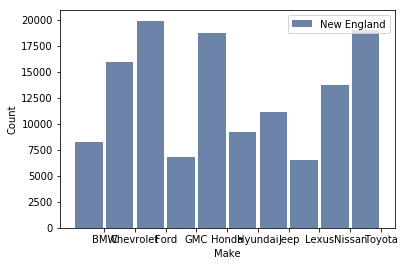

In [85]:
# New England contains CT, ME, MA, NH, RI, VT
hist = thinkstats2.Hist(newengland["Make Ss"], label='New England')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

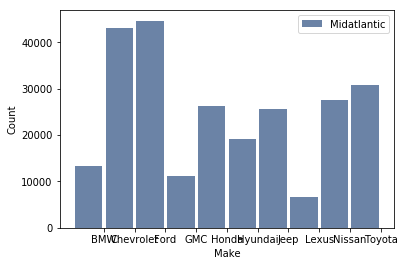

In [86]:
# Mid Atlantic contains NY, NJ, and PA
hist = thinkstats2.Hist(midatlantic["Make Ss"], label='Midatlantic')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

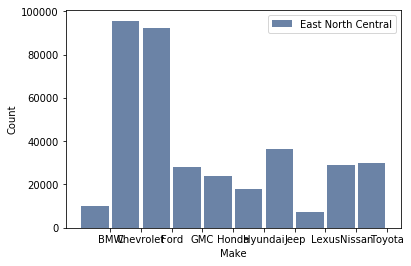

In [88]:
# East North Central contains IL, IN, MI, OH, WI
hist = thinkstats2.Hist(encentral["Make Ss"], label='East North Central')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

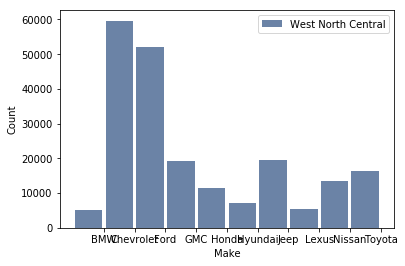

In [89]:
# West North Central contains IA, KS, MN, MI, NE, ND, SD
hist = thinkstats2.Hist(wncentral["Make Ss"], label='West North Central')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

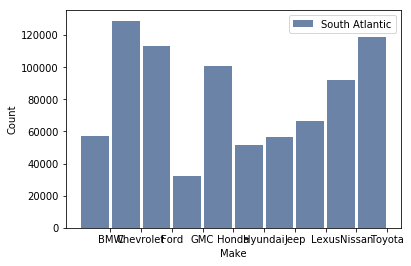

In [90]:
# South Atlantic contains FL, GA, SC, NC, VA, WV, DC, MD, DE
hist = thinkstats2.Hist(satlantic["Make Ss"], label='South Atlantic')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

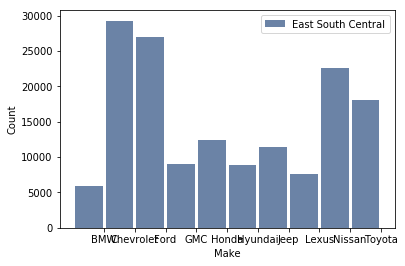

In [91]:
# East South Central contains AL, MS, TN, KY
hist = thinkstats2.Hist(escentral["Make Ss"], label='East South Central')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

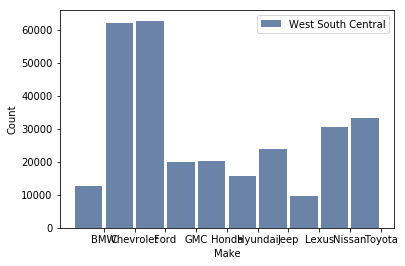

In [92]:
# West South Central contains AR, LA, OH, TX
hist = thinkstats2.Hist(wscentral["Make Ss"], label='West South Central')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

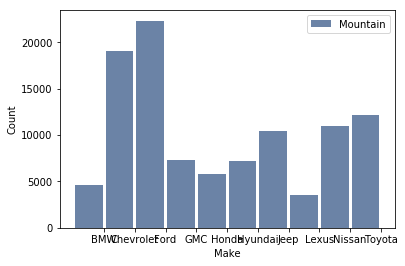

In [93]:
# Mountain contains AZ, CO, ID, MT, NV, NM, UT, WY
hist = thinkstats2.Hist(mountain["Make Ss"], label='Mountain')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')

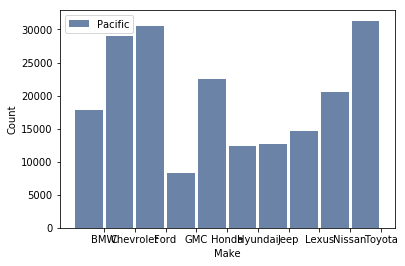

In [94]:
# Pacific contains AK, CA, HI, OR, WA
hist = thinkstats2.Hist(pacific["Make Ss"], label='Pacific')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Make', ylabel='Count')